## Отток клиентов

<a id="up"></a>

### Описание проекта

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте F1-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте AUC-ROC, сравнивайте её значение с F1-мерой.

### Задачи исследования

### [1. Загрузите и подготовьте данные. Поясните порядок действий.](#1)

### [2. Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.](#2)

### [3. Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.](#3)

### [4. Проведите финальное тестирование.](#4)

### Описание данных

`Признаки`

- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

`Целевой признак`
- Exited — факт ухода клиента

<a id="1"></a>

### 1. Откроем файлы и изучим общую информацию, подготовим данные.

In [1]:
import pandas as pd    
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    df = pd.read_csv('Churn.csv')
except Exception as e:
    print(e)
    df = pd.read_csv('/datasets/Churn.csv')

df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [5]:
df['Tenure'] = df['Tenure'].fillna(0)

In [6]:
df.duplicated().sum()

0

In [7]:
def values_column(df_frame):
    for column in df_frame.columns:
        print('Уникальные совпадения столбца', column)
        print(df_frame[column].value_counts())
        
values_column(df)

Уникальные совпадения столбца RowNumber
2049    1
8865    1
6806    1
4759    1
8857    1
       ..
9526    1
5432    1
7481    1
1338    1
2047    1
Name: RowNumber, Length: 10000, dtype: int64
Уникальные совпадения столбца CustomerId
15695872    1
15801062    1
15682268    1
15647453    1
15684319    1
           ..
15629677    1
15773039    1
15766896    1
15719793    1
15812607    1
Name: CustomerId, Length: 10000, dtype: int64
Уникальные совпадения столбца Surname
Smith       32
Martin      29
Scott       29
Walker      28
Brown       26
            ..
Renwick      1
Rios         1
Trout        1
Efremova     1
Chidalu      1
Name: Surname, Length: 2932, dtype: int64
Уникальные совпадения столбца CreditScore
850    233
678     63
655     54
667     53
705     53
      ... 
412      1
351      1
365      1
373      1
423      1
Name: CreditScore, Length: 460, dtype: int64
Уникальные совпадения столбца Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype:

Удалим столбцы `RowNumber, CustomerId и Surname`, для исследовании модели они не потребуются, т.к.
- `RowNumber` повторяет индекс строки в данных, 
- `CustomerId` - случайный или последовательный номер, который никак не зависит от действий пользователя,
- `Surname` - признак, фамилия, это не гарант того, что клиент останется или уйдет.

In [8]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Применим прямое кодирование ко всему датафрейму, чтобы не попасть в дамми-ловушку. Сохраним таблицу в переменной df_ohe. 

In [9]:
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


#### Вывод:
- данные готовы к исследованию,
- были удалены столбцы `RowNumber, CustomerId и Surname`, для исследовании модели они не потребуются,
- заменены пропущеные значения стлбца `Tenure` — сколько лет человек является клиентом банка, на нулевое значение.

<a id="2"></a>

### 2. Исследование

Разобьем исходный набор данных на три части: обучающую, валидационную и тестовую.(60/20/20) Размеры тестового и валидационного наборов сделаем равными.

In [10]:
target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, 
                                                                              random_state=28012022)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, 
                                                                              random_state=28012022)
print(features_train.shape, features_valid.shape, features_test.shape)
print(target_train.shape, target_valid.shape, target_test.shape)

(6000, 11) (2000, 11) (2000, 11)
(6000,) (2000,) (2000,)


Посмотрим, какой существует дисбаланс классов.

In [11]:
target.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Соотношение классов 1:4. Изучим модели без исправление баланса.

##### Логистическая регрессия

In [12]:
%%time

model = LogisticRegression(solver='liblinear', random_state=28012022)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1','=', f1_score(target_valid, predicted_valid))

F1 = 0.10071942446043165
Wall time: 570 ms


- при дисбалансе классов логистическая регрессия предсказывает крайне плохо.

#### Дерево решений

In [13]:
%%time

for depth in range(2, 24, 2):
    model = DecisionTreeClassifier(random_state=28012022, max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('Max depth', depth,"",'F1','=', f1_score(target_valid, predicted_valid))
   

Max depth 2  F1 = 0.49837133550488605
Max depth 4  F1 = 0.5009560229445507
Max depth 6  F1 = 0.5723577235772358
Max depth 8  F1 = 0.5652173913043478
Max depth 10  F1 = 0.5641838351822505
Max depth 12  F1 = 0.534711964549483
Max depth 14  F1 = 0.5105189340813464
Max depth 16  F1 = 0.4952638700947226
Max depth 18  F1 = 0.49343832020997375
Max depth 20  F1 = 0.49546044098573283
Max depth 22  F1 = 0.5
Wall time: 376 ms


- Пока лучшие результаты 0.5723577235772358 получили у модели с глубиной равной 6.

##### Случайный лес

В качестве гиперпараметра глубины дерева возьмем значение, найденное для предыдущей модели. А количество деревьев для нашего случайного леса будет искать в диапазоне от 10 до 200 с шагом 10.

In [14]:
%%time

for estim in range(10, 201, 10):
    model =  RandomForestClassifier(random_state=28012022, n_estimators=estim, max_depth=6)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('n-estimators', estim,"",'F1','=', f1_score(target_valid, predicted_valid))

n-estimators 10  F1 = 0.5421245421245422
n-estimators 20  F1 = 0.5333333333333333
n-estimators 30  F1 = 0.5464480874316939
n-estimators 40  F1 = 0.5527272727272726
n-estimators 50  F1 = 0.5467889908256881
n-estimators 60  F1 = 0.5594149908592322
n-estimators 70  F1 = 0.5541284403669724
n-estimators 80  F1 = 0.5488029465930018
n-estimators 90  F1 = 0.5471349353049907
n-estimators 100  F1 = 0.5394495412844036
n-estimators 110  F1 = 0.5421245421245422
n-estimators 120  F1 = 0.5457875457875457
n-estimators 130  F1 = 0.5431192660550459
n-estimators 140  F1 = 0.5447897623400365
n-estimators 150  F1 = 0.5447897623400365
n-estimators 160  F1 = 0.5447897623400365
n-estimators 170  F1 = 0.5431192660550459
n-estimators 180  F1 = 0.5404411764705883
n-estimators 190  F1 = 0.5447897623400365
n-estimators 200  F1 = 0.5447897623400365
Wall time: 11.8 s


- Лучший результат был получен в районе 30-50 n_estimators. Сделаем исследование с шагом 1.

In [15]:
%%time

for estim in range(30, 51, 1):
    model =  RandomForestClassifier(random_state=28012022, n_estimators=estim, max_depth=6)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('n-estimators', estim,"",'F1','=', f1_score(target_valid, predicted_valid))

n-estimators 30  F1 = 0.5464480874316939
n-estimators 31  F1 = 0.5569620253164557
n-estimators 32  F1 = 0.5527272727272726
n-estimators 33  F1 = 0.5543478260869567
n-estimators 34  F1 = 0.5595667870036101
n-estimators 35  F1 = 0.5621621621621622
n-estimators 36  F1 = 0.5537340619307832
n-estimators 37  F1 = 0.5537340619307832
n-estimators 38  F1 = 0.5553539019963702
n-estimators 39  F1 = 0.5500910746812386
n-estimators 40  F1 = 0.5527272727272726
n-estimators 41  F1 = 0.5605786618444846
n-estimators 42  F1 = 0.5709156193895871
n-estimators 43  F1 = 0.5615942028985507
n-estimators 44  F1 = 0.5599999999999999
n-estimators 45  F1 = 0.5610200364298725
n-estimators 46  F1 = 0.5626134301270417
n-estimators 47  F1 = 0.5610200364298725
n-estimators 48  F1 = 0.5537340619307832
n-estimators 49  F1 = 0.5477941176470589
n-estimators 50  F1 = 0.5467889908256881
Wall time: 4.71 s


- Модель случайного леса предсказывает чуть хуже, чем дерево решений. Лучший результат 0.5709156193895871 достигается при количестве деревьев равном 42.

##### Проведем оценку `accuracy, precision и recall`, также покажем `F-метрику`.

In [16]:
%%time

model = LogisticRegression(random_state=28012022, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия','\n')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = DecisionTreeClassifier(random_state=28012022, max_depth=6)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Дерево решений','\n')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=28012022, n_estimators=42)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Случайный лес','\n')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()


Логистическая регрессия 

Точность попадания по классам 0.8125
Precision 0.3620689655172414
Recall 0.0584958217270195
F1 0.10071942446043165

Дерево решений 

Точность попадания по классам 0.8685
Precision 0.6875
Recall 0.49025069637883006
F1 0.5723577235772358

Случайный лес 

Точность попадания по классам 0.8745
Precision 0.7347826086956522
Recall 0.47075208913649025
F1 0.5738539898132428

Wall time: 473 ms


##### Проведем построение `ROC-кривой` для каждой модели. И выведем показатель `AUC-ROC`.

AUC-ROC Логистическая регрессия 0.6690634659550957
AUC-ROC Дерево решений 0.8194464955297656
AUC-ROC Случайный лес 0.8369251373661348


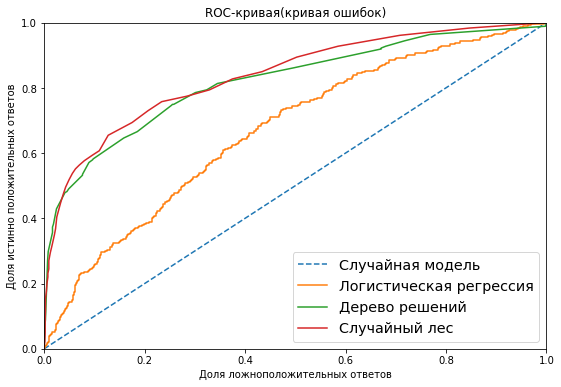

In [17]:
plt.figure(figsize=[9,6])

plt.plot([0, 1], [0, 1], linestyle='--', label='Случайная модель')

model = LogisticRegression(random_state=28012022, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC Логистическая регрессия',auc_roc)
plt.plot(fpr, tpr, label='Логистическая регрессия')

model = DecisionTreeClassifier(random_state=28012022, max_depth=6)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC Дерево решений',auc_roc)
plt.plot(fpr, tpr, label='Дерево решений')

model = RandomForestClassifier(random_state=28012022, n_estimators=42)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC Случайный лес', auc_roc)
plt.plot(fpr, tpr, label='Случайный лес')


plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("Доля ложноположительных ответов")
plt.ylabel("Доля истинно положительных ответов")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая(кривая ошибок)")
plt.show()

- Метрика `F1 и AUC-ROC` лучшая на случайном лесе.

#### Вывод:
- в данных сущестует дисбаланс классов в отношении 1:4,
- дисбаланс влияет на качество изучаемых моделей,
- некоторые модели имеют recall ниже, чем percision, что влияет на F-меру.

<a id="3"></a>

### 3. Улучшение качества модели, учитывая дисбаланс классов.

Изучим поведение моделей:
- при взвешивании классов,
- при увеличении выборки,
- при уменьшении выборки.

##### Изучим возможности моделей по взвешиванию классов, придадим объектам редкого класса больший вес.

In [18]:
%%time

model = LogisticRegression(random_state=28012022, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия','\n')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = DecisionTreeClassifier(random_state=28012022, max_depth=6, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Дерево решений','\n')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=28012022, n_estimators=42, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Случайный лес', '\n')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()



Логистическая регрессия 

Точность попадания по классам 0.669
Precision 0.315018315018315
Recall 0.7186629526462396
F1 0.43803056027164683

Дерево решений 

Точность попадания по классам 0.7625
Precision 0.41131498470948014
Recall 0.7493036211699164
F1 0.5310957551826259

Случайный лес 

Точность попадания по классам 0.8725
Precision 0.7626262626262627
Recall 0.4206128133704735
F1 0.5421903052064632

Wall time: 483 ms


- F1-мера понизилась у дерева решений и случайного леса, но выросла у логистической регресии.

##### Увеличение выборки

Cделаем объекты редкого класса не такими редкими и переобучим модели.

In [19]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    repeat = 10
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=28012022)
    
    return features_upsampled, target_upsampled 

features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

print(features_upsampled.shape)
print(target_upsampled.shape)

(17430, 11)
(17430,)


In [20]:
%%time

model = LogisticRegression(random_state=28012022, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия','\n')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = DecisionTreeClassifier(random_state=28012022, max_depth=7)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Дерево решений','\n')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=28012022, n_estimators=53)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Случайный лес','\n')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()



Логистическая регрессия 

Точность попадания по классам 0.217
Precision 0.18616744669786792
Recall 0.9972144846796658
F1 0.3137598597721297

Дерево решений 

Точность попадания по классам 0.5715
Precision 0.27807486631016043
Recall 0.8690807799442897
F1 0.4213369345037137

Случайный лес 

Точность попадания по классам 0.8675
Precision 0.6643356643356644
Recall 0.5292479108635098
F1 0.5891472868217055

Wall time: 1.12 s


- F1-мера стала лучше у случайного леса по сравнению с дисбалансными данными. Лучшей моделью по F1-мера стал случайны лес с тренировочными данными, где увеличен класс 1.

##### Уменьшение выборки

In [21]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=28012022)]
                                    + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=28012022)]
                                    + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=28012022)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

print(features_downsampled.shape)
print(target_downsampled.shape)

(1743, 11)
(1743,)


In [22]:
%%time

model = LogisticRegression(random_state=28012022, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия','\n')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = DecisionTreeClassifier(random_state=28012022, max_depth=6)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Дерево решений','\n')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=28012022, n_estimators=42)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Случайный лес','\n')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()


Логистическая регрессия 

Точность попадания по классам 0.219
Precision 0.18590078328981724
Recall 0.9916434540389972
F1 0.3131046613896218

Дерево решений 

Точность попадания по классам 0.616
Precision 0.29852216748768473
Recall 0.8440111420612814
F1 0.4410480349344978

Случайный лес 

Точность попадания по классам 0.578
Precision 0.2836752899197145
Recall 0.8857938718662952
F1 0.42972972972972967

Wall time: 248 ms


- У всех моделей выросла `Recall` : модели хорошо ищут положительные объекты, а `F1-мера` уменьшилась, прогноз класса 0 не удался.

##### Проведем построение `ROC-кривой` для каждой модели и выведем показатель `AUC-ROC` для увеличенной выборки

AUC-ROC Логистическая регрессия 0.713511192136054
AUC-ROC Дерево решений 0.8262702442121201
AUC-ROC Случайный лес 0.8394993201713067


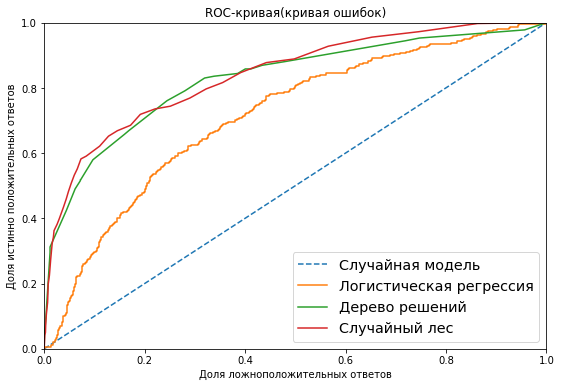

In [23]:
plt.figure(figsize=[9,6])

plt.plot([0, 1], [0, 1], linestyle='--', label='Случайная модель')

model = LogisticRegression(random_state=28012022, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC Логистическая регрессия',auc_roc)
plt.plot(fpr, tpr, label='Логистическая регрессия')

model = DecisionTreeClassifier(random_state=28012022, max_depth=6)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC Дерево решений',auc_roc)
plt.plot(fpr, tpr, label='Дерево решений')

model = RandomForestClassifier(random_state=28012022, n_estimators=42)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC Случайный лес', auc_roc)
plt.plot(fpr, tpr, label='Случайный лес')


plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("Доля ложноположительных ответов")
plt.ylabel("Доля истинно положительных ответов")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая(кривая ошибок)")
plt.show()

- `Метрика F1 и AUC-ROC лучшая на случайном лесе для увеличенной выборки`

 #### Вывод:
- дисбаланс повлиял на модели в худшую сторону, решением стало увеличение классов 1 в тренировочной выборке,
- выравние и уменьшение классов в выборке привело к резкому росту параметра recall и небольшому понижению percison.

<a id="4"></a>

### 4. Финальное тестирование

К тестовой выборке примем модель случайного дерева. Исследуем гиперпараметры и улучшим F-меру модели.



##### Гиперпараметр n_estimators.

In [24]:
%%time

for estim in range(10, 500, 20):
    model =  RandomForestClassifier(random_state=28012022, n_estimators=estim)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('n-estimators', estim,"",'F1','=', f1_score(target_valid, predicted_valid))

n-estimators 10  F1 = 0.5492063492063491
n-estimators 30  F1 = 0.5829457364341085
n-estimators 50  F1 = 0.5878693623639191
n-estimators 70  F1 = 0.5816485225505443
n-estimators 90  F1 = 0.5862595419847328
n-estimators 110  F1 = 0.5893129770992365
n-estimators 130  F1 = 0.5840978593272171
n-estimators 150  F1 = 0.5815384615384616
n-estimators 170  F1 = 0.5893129770992365
n-estimators 190  F1 = 0.588597842835131
n-estimators 210  F1 = 0.5916795069337443
n-estimators 230  F1 = 0.5929339477726575
n-estimators 250  F1 = 0.5947611710323575
n-estimators 270  F1 = 0.588597842835131
n-estimators 290  F1 = 0.5895061728395061
n-estimators 310  F1 = 0.5916795069337443
n-estimators 330  F1 = 0.5947611710323575
n-estimators 350  F1 = 0.598159509202454
n-estimators 370  F1 = 0.5969230769230769
n-estimators 390  F1 = 0.5941807044410412
n-estimators 410  F1 = 0.5941807044410412
n-estimators 430  F1 = 0.5975609756097562
n-estimators 450  F1 = 0.6003062787136293
n-estimators 470  F1 = 0.5993883792048929


Лучший результат лежит в диапазоне 390-430.

In [25]:
%%time

for estim in range(390, 432):
    model =  RandomForestClassifier(random_state=28012022, n_estimators=estim)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('n-estimators', estim,"",'F1','=', f1_score(target_valid, predicted_valid))

n-estimators 390  F1 = 0.5941807044410412
n-estimators 391  F1 = 0.5941807044410412
n-estimators 392  F1 = 0.5941807044410412
n-estimators 393  F1 = 0.5941807044410412
n-estimators 394  F1 = 0.5941807044410412
n-estimators 395  F1 = 0.5941807044410412
n-estimators 396  F1 = 0.5941807044410412
n-estimators 397  F1 = 0.5932721712538226
n-estimators 398  F1 = 0.5941807044410412
n-estimators 399  F1 = 0.5941807044410412
n-estimators 400  F1 = 0.5941807044410412
n-estimators 401  F1 = 0.5941807044410412
n-estimators 402  F1 = 0.5941807044410412
n-estimators 403  F1 = 0.5941807044410412
n-estimators 404  F1 = 0.5941807044410412
n-estimators 405  F1 = 0.5941807044410412
n-estimators 406  F1 = 0.5941807044410412
n-estimators 407  F1 = 0.5941807044410412
n-estimators 408  F1 = 0.5941807044410412
n-estimators 409  F1 = 0.5941807044410412
n-estimators 410  F1 = 0.5941807044410412
n-estimators 411  F1 = 0.5941807044410412
n-estimators 412  F1 = 0.5941807044410412
n-estimators 413  F1 = 0.594180704

- `Лучшее значение F1-меры = 0.6118721461187214 при количестве деревьев равным от 399 до 425 и при количестве деревьев равным 429` 

In [26]:
%%time

for estim in range(399, 426):
    model =  RandomForestClassifier(random_state=28012022, n_estimators=estim, criterion='entropy')
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('n-estimators', estim,"",'F1','=', f1_score(target_valid, predicted_valid))

n-estimators 399  F1 = 0.608955223880597
n-estimators 400  F1 = 0.608955223880597
n-estimators 401  F1 = 0.608955223880597
n-estimators 402  F1 = 0.608955223880597
n-estimators 403  F1 = 0.608955223880597
n-estimators 404  F1 = 0.6068759342301944
n-estimators 405  F1 = 0.608955223880597
n-estimators 406  F1 = 0.608955223880597
n-estimators 407  F1 = 0.6080476900149031
n-estimators 408  F1 = 0.6080476900149031
n-estimators 409  F1 = 0.6080476900149031
n-estimators 410  F1 = 0.6080476900149031
n-estimators 411  F1 = 0.6071428571428572
n-estimators 412  F1 = 0.6047904191616768
n-estimators 413  F1 = 0.6062407132243685
n-estimators 414  F1 = 0.6059701492537314
n-estimators 415  F1 = 0.6062407132243685
n-estimators 416  F1 = 0.6026986506746627
n-estimators 417  F1 = 0.6017964071856287
n-estimators 418  F1 = 0.6036036036036037
n-estimators 419  F1 = 0.6026986506746627
n-estimators 420  F1 = 0.6036036036036037
n-estimators 421  F1 = 0.6047904191616768
n-estimators 422  F1 = 0.6056971514242879

In [27]:
%%time


model =  RandomForestClassifier(random_state=28012022, n_estimators=422, criterion='entropy')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('n-estimators', estim,"",'F1','=', f1_score(target_valid, predicted_valid))

n-estimators 425  F1 = 0.6056971514242879
Wall time: 9.25 s


##### Изменим гиперпараметр min_samples_split.

In [28]:
%%time

for samples_split in range(1, 11):
    model =  RandomForestClassifier(random_state=28012022, n_estimators=422, min_samples_split=samples_split/10)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('Samples_split', samples_split/10,"",'F1','=', f1_score(target_valid, predicted_valid))
    
for samples_split in range(2, 11):
    model =  RandomForestClassifier(random_state=28012022, n_estimators=422, min_samples_split=samples_split)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('Samples_split', samples_split,"",'F1','=', f1_score(target_valid, predicted_valid))

Samples_split 0.1  F1 = 0.3699731903485255
Samples_split 0.2  F1 = 0.3205013428827216
Samples_split 0.3  F1 = 0.3043662568885121
Samples_split 0.4  F1 = 0.3043662568885121
Samples_split 0.5  F1 = 0.3043662568885121
Samples_split 0.6  F1 = 0.3043662568885121
Samples_split 0.7  F1 = 0.3043662568885121
Samples_split 0.8  F1 = 0.3043662568885121
Samples_split 0.9  F1 = 0.3043662568885121
Samples_split 1.0  F1 = 0.3043662568885121
Samples_split 2  F1 = 0.5972434915773354
Samples_split 3  F1 = 0.5993883792048929
Samples_split 4  F1 = 0.6085626911314985
Samples_split 5  F1 = 0.6027397260273973
Samples_split 6  F1 = 0.6098654708520179
Samples_split 7  F1 = 0.6033182503770739
Samples_split 8  F1 = 0.6085672082717873
Samples_split 9  F1 = 0.6060606060606061
Samples_split 10  F1 = 0.6077032810271041
Wall time: 1min 30s


- `Лучший F1 получен при min_samples_split=8.`

##### Изменим гиперпараметр min_samples_leaf.

In [29]:
%%time

for samples_leaf in range(1, 6):
    model =  RandomForestClassifier(random_state=28012022, n_estimators=422, min_samples_split=5, 
                                    min_samples_leaf= samples_leaf/10)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('Samples_leaf', samples_leaf/10,"",'F1','=', f1_score(target_valid, predicted_valid))
    
for samples_leaf in range(1, 11):
    model =  RandomForestClassifier(random_state=28012022, n_estimators=422, min_samples_split=5,
                                   min_samples_leaf= samples_leaf)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('Samples_leaf', samples_leaf,"",'F1','=', f1_score(target_valid, predicted_valid))

Samples_leaf 0.1  F1 = 0.3043662568885121
Samples_leaf 0.2  F1 = 0.3043662568885121
Samples_leaf 0.3  F1 = 0.3043662568885121
Samples_leaf 0.4  F1 = 0.3043662568885121
Samples_leaf 0.5  F1 = 0.3043662568885121
Samples_leaf 1  F1 = 0.6027397260273973
Samples_leaf 2  F1 = 0.6056527590847914
Samples_leaf 3  F1 = 0.5901234567901235
Samples_leaf 4  F1 = 0.5648679678530425
Samples_leaf 5  F1 = 0.5583424209378408
Samples_leaf 6  F1 = 0.5429769392033543
Samples_leaf 7  F1 = 0.5350701402805611
Samples_leaf 8  F1 = 0.5321637426900585
Samples_leaf 9  F1 = 0.5258126195028681
Samples_leaf 10  F1 = 0.5189990732159406
Wall time: 1min 22s


- `Лучший F1 получен при Samples_leaf=2.`

In [30]:
%%time

for depth in range(20, 48, 2):
    model = RandomForestClassifier(random_state=28012022, max_depth=depth, n_estimators=422,
                                    min_samples_split=8,min_samples_leaf=2)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('Max depth', depth,"",'F1','=', f1_score(target_valid, predicted_valid))

Max depth 20  F1 = 0.609271523178808
Max depth 22  F1 = 0.618279569892473
Max depth 24  F1 = 0.6133333333333333
Max depth 26  F1 = 0.6098535286284953
Max depth 28  F1 = 0.6117021276595744
Max depth 30  F1 = 0.6117021276595744
Max depth 32  F1 = 0.6117021276595744
Max depth 34  F1 = 0.6117021276595744
Max depth 36  F1 = 0.6117021276595744
Max depth 38  F1 = 0.6117021276595744
Max depth 40  F1 = 0.6117021276595744
Max depth 42  F1 = 0.6117021276595744
Max depth 44  F1 = 0.6117021276595744
Max depth 46  F1 = 0.6117021276595744
Wall time: 1min 40s


##### Проверим на тестовой выборке четыре модели: на дисбалансных данных и сбалансированных: со взвешенными классами, 
##### усечением 0 класса и расширением класса 1 c `max_depth=28, n_estimators=422, min_samples_split=8, min_samples_leaf=2`

In [31]:
model = RandomForestClassifier(random_state=28012022, max_depth=28, n_estimators=422,
                                    min_samples_split=8, min_samples_leaf=2)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Случайный лес - дисбаланс классов','\n')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=28012022, max_depth=28, n_estimators=422,
                                    min_samples_split=8, min_samples_leaf=2, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Случайный лес - взвешенные классы','\n')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=28012022, max_depth=28, n_estimators=422,
                                    min_samples_split=8, min_samples_leaf=2)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
print('Случайный лес - уменьшенное количество классов 0','\n')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=28012022, max_depth=28, n_estimators=422,
                                    min_samples_split=8, min_samples_leaf=2)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print('Случайный лес - увеличенное количество классов 1','\n')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

Случайный лес - дисбаланс классов 

Точность попадания по классам 0.8595
Precision 0.777292576419214
Recall 0.4362745098039216
F1 0.5588697017268446

Случайный лес - взвешенные классы 

Точность попадания по классам 0.849
Precision 0.6558823529411765
Recall 0.5465686274509803
F1 0.5962566844919786

Случайный лес - уменьшенное количество классов 0 

Точность попадания по классам 0.5765
Precision 0.31693077564637195
Recall 0.9313725490196079
F1 0.4729309271935283

Случайный лес - увеличенное количество классов 1 

Точность попадания по классам 0.83
Precision 0.5794392523364486
Recall 0.6078431372549019
F1 0.5933014354066984



AUC-ROC Случайный лес - дисбаланс классов 0.8508027268696423
AUC-ROC Случайный лес - взвешенные классы  0.8530443270272934
AUC-ROC Случайный лес - уменьшенное количество классов 0 0.845632882550005
AUC-ROC Случайный лес - увеличенное количество классов 1 0.8505025125628142


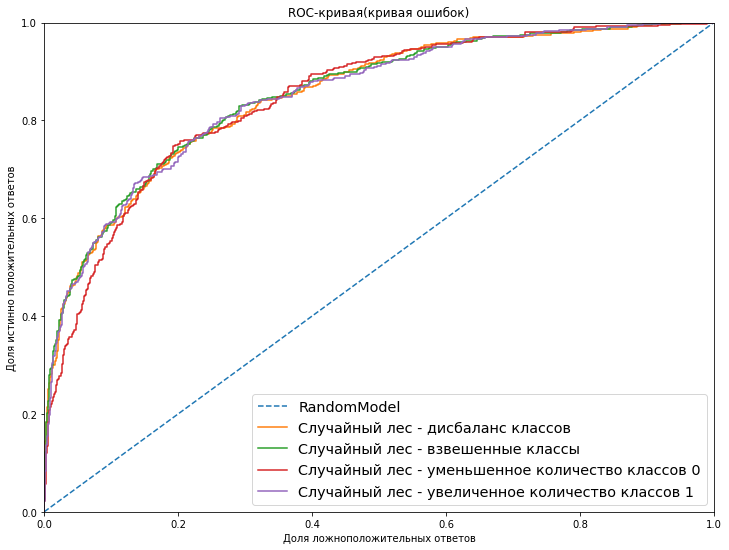

In [32]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')


model = RandomForestClassifier(random_state=28012022, max_depth=28, n_estimators=422,
                                    min_samples_split=8, min_samples_leaf=2)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC Случайный лес - дисбаланс классов',auc_roc)
plt.plot(fpr, tpr, label='Случайный лес - дисбаланс классов')

model = RandomForestClassifier(random_state=28012022, max_depth=28, n_estimators=422,
                                    min_samples_split=8, min_samples_leaf=2, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC Случайный лес - взвешенные классы ',auc_roc)
plt.plot(fpr, tpr, label='Случайный лес - взвешенные классы ')

model = RandomForestClassifier(random_state=28012022, max_depth=28, n_estimators=422,
                                    min_samples_split=8, min_samples_leaf=2)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC Случайный лес - уменьшенное количество классов 0',auc_roc)
plt.plot(fpr, tpr, label='Случайный лес - уменьшенное количество классов 0')

model = RandomForestClassifier(random_state=28012022, max_depth=28, n_estimators=422,
                                    min_samples_split=8, min_samples_leaf=2)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC Случайный лес - увеличенное количество классов 1',auc_roc)
plt.plot(fpr, tpr, label='Случайный лес - увеличенное количество классов 1')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("Доля ложноположительных ответов")
plt.ylabel("Доля истинно положительных ответов")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая(кривая ошибок)")
plt.show()

#### Вывод:
- 2 из 4 моделей достигли минимума F-меры на тестовых данных: модель случайного леса со взвешенными классами и модель с увеличенным количеством класса 1,
- видно, что увеличенное количество классов 1 дает результат лучше для данного набора данных. Percision падает, recall растет, и в целом F-мера имеет небольшой прирост,
- оценивая адеватность модели можно заметить, что AUC-ROC со взвешенными классами предсказывает вероятность ухода клиента,
- в результате исследования была получена модель с лучшими показателями как по F1-мере, так и по AUC-ROC - Случайный лес: увеличенное количество классов 1.

### Итог:
При работе с проектом было выполнено:

- Изучены данные.
- Разбиты данные на тренировочную, валидационную и тестовую выборку.
- Исследована задача. Проверены модели на данных без изменений.
- Скоректирован балланс класса. Изменен вес класса.
- Получена улученная модель. Проведен поиск гиперпараметров.
- Проведен финальный тест.

Обученная модель случайного леса с увеличенным количеством классов 1 имеет достаточную адекватность, подтвержденная ее значением AUC-ROC = 0.851. Это лучше, чем случайная модель предсказывания (AUC-ROC = 0.5). Точность попадания по классам 0.834, precision 0.587, recall 0.627 и F1 0.606. Модель старается собрать больше данных, чем показать верную точность (recall > precision). Процент попадания в классы достаточно высокий.

[наверх к оглавлению](#up)